# Basic Dataset Analysis

## Smartphone Application Dataset Analysis


## In this Notebook, analyse the dataset for Smartphone Application

Use csv file 'dataset.csv' with all the data    
There are 13 columns in the csv file.    
The first row is the header.    
Following are the description for each column
1.App	
2.Category   
3.Rating  
4.Reviews	
5.Size	
6.Installs	
7.Type	
8.Price	
9.Content Rating	
10.Genres	
11.Last Updated	
12.Current Ver	
13.Android Ver





### The series of steps to follow :
> #### 1. Import Packages
> #### 2. Read Data
> #### 3. Data Preprocessing
    > #### -  3.1 Handling NULL or Duplicate Values
    > #### -  3.2 Handling Data Types and Values
> #### 4. Analyzing Features
> #### 5. Further Analysis



<a id='1'></a>
## 1. Importing the required packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

#Add code 
#add module here
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Add code 

from google.colab import drive
drive.mount('/content/drive/')

data_dir_path='/content/drive/My Drive/Data/DSA1/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


***

<a id='2'></a>
## 2.  Reading Data


In [3]:
#read in the csv file 'dataset.csv'
#display the first 5 rows of data


df=pd.read_csv(data_dir_path+'dataset.csv')
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(df.shape) #to understand the shape of the dataset

(10841, 13)


In [5]:
#count the number of rows in which there is at least one null value in that row.
(df.isnull()).any(axis=1).sum()

1481

***

<a id='3.1'></a>

## 3. Data Preprocessing



### 3.1 Handling NULL or Duplicate Values

#### This is a very crucial step. 

This setp will improves the accuracy of insights and predictions.   


In [6]:
pd.options.display.max_columns = None
print('df.isnull().sum() :','\n{}'.format(df.isnull().sum()))
#Count all NaN in a DataFrame (both columns & Rows)
print('df.isnull().sum().sum() :','\n{}'.format(df.isnull().sum().sum()))

df.dropna(axis=0,inplace=True) #add axis=0 just to be explicit that only rows are removed.

print(df.head())
print(df.shape)

df.isnull().sum() : 
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
df.isnull().sum().sum() : 
1487
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free  

#### There are also duplicates in the dataset
Remove the duplicated entries in the dataset 




In [7]:

df.drop_duplicates(keep='first', inplace=True, ignore_index=True)


print(df)

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
8881                                      FR Calculator               FAMILY   
8882                                   Sya9a Maroc - FR               FAMILY   
8883                   Fr. Mike Schmitz Audio Teachings               FAMILY   
8884                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
8885      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Siz

In [8]:
display(df)  #this is a much neater presentation than print(df)
df.App.nunique() #explore how many unique app titles. 
              #the result shows there are 696 apps repeated.
              #but are not considered as duplicates because other columns' data are different.  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


8190

#### Print the shape of the data read
Display the size of the dataset read

In [9]:
df.shape

(8886, 13)

>  ####   After removing the rows with NULL values and the duplicated entries, there are 886 apps left for analysis. 


> #### Let's analyze their ratings and performance.

***

<a id='3.2'></a>
### 3.2 Handling Data Types of each Feature

#### The data types of each feature must be changed to a proper format that can be used for analysis.

The feature *Reviews* must be of numerical type. 


In [10]:
print(df.dtypes)  # Displaying Data types of each feature.

print(df.Reviews.describe())            # to better understand the data in df.Reviews.
print('\n',df.Reviews.nunique(),'\n')   # Shows that 5990 unique reviews number.

df.Reviews=pd.to_numeric(df.Reviews, downcast='integer').astype('int64')

print(df.dtypes) #column Reviews change the type into int64

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
count     8886
unique    5990
top          2
freq        82
Name: Reviews, dtype: object

 5990 

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


#### Changing the Feature : Installs

Other Features like *Size*, *Installs*, *Price* and *Android Vers* also must be of numeric type.    

The install values they are holding must be changed to a proper format so that we can use them for analysis and plots.    

Example : '10,000+' to 10000

In [11]:
#Before completing the next section, need to understand more about the occurances of '+' in the string.
print(df.Installs.str.find('+'))
#results show the lowest index in each row where '+' is found in string. 
#this is to get an idea where '+' is found in the string. 
display(df.Installs.str.find('+').value_counts(),(df.Installs.str.find('+').value_counts()).sum())
#it seems like every row in Installs column has a '+'.
#we will use this result to perform operation in next cell.

0        6
1        7
2        9
3       10
4        7
        ..
8881     3
8882     5
8883     3
8884     5
8885    10
Name: Installs, Length: 8886, dtype: int64


9     2168
7     1625
6     1449
10    1404
5     1122
3      502
11     430
2      125
13      49
1       12
Name: Installs, dtype: int64

8886

In [12]:

newInstalls = []  #given a new list newInstalls
#loop through the df.Install to do the change Example : '10,000+' to 10000 
for row in df.Installs:
  row =  row.replace('+','') #add code:  remove the last char +
  newRow = row.replace(',','') #add code: use row content to remove , 
  newInstalls.append(float(newRow)) #add code: convert newRow to float)
  
df.Installs = newInstalls  #update the new content into df column Installs
df.Installs.head()


0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

#### Changing the feature : Size

The column Size value is not usable for data analysis

Change 15M to 15.0

In [13]:
# below is a preliminary investigation into Size column and 'M' occurances before proceeding.
print(df.Size.value_counts()) 
                     #result shows there are 1468 rows with string 'Varies with device'
                     #there are some other numbers ending with 'M' and some end with 'k'

print((df.Size.str.find('M')!=-1).sum(),df.Size.str.endswith('M').sum())
#this shows that number of rows with 'M' is equal to number of rows with 'M'  at the end of string.

Varies with device    1468
14M                    153
13M                    152
12M                    151
11M                    149
                      ... 
811k                     1
582k                     1
721k                     1
608k                     1
540k                     1
Name: Size, Length: 413, dtype: int64
7162 7162


In [14]:

newSize = []
for row in df.Size:
    newrow = row.replace('M','') #add code: remove last char M
    try:
        newSize.append(float(newrow))#add code: convert the newrow into float)
    except:
        newSize.append(0) #When it says - Size Varies.   
df.Size = newSize #update the newSize into df Size column
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

#### Changing the feature : Price
Most value in the df Price column is 0 but some have   
```
$2.44
```


In [15]:
df.Price.value_counts()
#there are 8275 rows with 0 price. ie. Free. 

0        8275
$2.99     110
$0.99     104
$4.99      68
$1.99      59
         ... 
$1.97       1
$2.50       1
$6.49       1
$1.20       1
$3.90       1
Name: Price, Length: 73, dtype: int64

In [16]:
newPrice = []
for row in df.Price:
    if row!=0: #add code: to compare row not equal to 0:
        #now this row content is likely eg. $2.44      
        newrow = float(row.replace('$',''))#add code: extract row content without '$' then convert to float
    else:
        newrow = 0       
    newPrice.append(newrow)       
df.Price = newPrice
df.Price.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

#### Changing the feature: Android Ver
df column Android Ver has data like "4.0.3 and up"    
only interested on the major version not the minor version   
change "4.0.3 and up" to "4.0"

In [17]:
#to get a rough idea of the data in 'Android Ver'
df['Android Ver'].value_counts()
#there are 1178 rows with string 'Varies with device'
#there are several versions with minor versions. 
#some versions have '-' in between.

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [18]:

newVer = []
for row in df['Android Ver']:
    try:
        newrow = float(row[0:3])# get row content extract the major version and convert to float
    except:
        newrow = 0  # When the value is - Varies with device   
    newVer.append(newrow)
df['Android Ver'] =  newVer
df['Android Ver'] # total count for each Android Ver

0       4.0
1       4.0
2       4.0
3       4.2
4       4.4
       ... 
8881    4.1
8882    4.1
8883    4.1
8884    0.0
8885    0.0
Name: Android Ver, Length: 8886, dtype: float64

In [19]:
df  #check the result in df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,0.0


<a id='4'></a>
## 4. Analyzing Features :

### 4.1 Categories




#### Find the Total count for each of the Category 


```
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
```



In [20]:

df.Category.value_counts()#add code to get total count of each Category

#to display just the top 5 Category
(df.Category.value_counts())[0:5]

FAMILY          1717
GAME            1074
TOOLS            733
PRODUCTIVITY     334
FINANCE          317
Name: Category, dtype: int64

#### Group using the column 'Type', 'Category' and aggregate Rating with the mean



```
		                          Rating
                               mean
Type    Category	
Free	 ART_AND_DESIGN	       4.358621
       AUTO_AND_VEHICLES	    4.184722
       BEAUTY	                4.278571
       BOOKS_AND_REFERENCE	  4.350888
       BUSINESS	              4.103448
...	...	...
Paid	   SPORTS	              4.254545
         TOOLS          	    4.169841
        TRAVEL_AND_LOCAL     	4.100000
        VIDEO_PLAYERS	        4.100000
        WEATHER	              4.371429
```




In [21]:
info=df.groupby(['Type','Category'])['Rating'].mean()  #using df then Group using the column 'Type', 'Category'and aggregate Rating with the mean
info


Type  Category           
Free  ART_AND_DESIGN         4.358621
      AUTO_AND_VEHICLES      4.184722
      BEAUTY                 4.278571
      BOOKS_AND_REFERENCE    4.350888
      BUSINESS               4.103448
                               ...   
Paid  SPORTS                 4.254545
      TOOLS                  4.169841
      TRAVEL_AND_LOCAL       4.100000
      VIDEO_PLAYERS          4.100000
      WEATHER                4.371429
Name: Rating, Length: 61, dtype: float64

### 4.2 Price 
#####  Find the most costly App in the PlayStore.


In [22]:

dfPriceMax=df[df.Price==df.Price.max()] #Find the row where the column price is max and store as a dataframe]
dfPriceMax

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3747,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1


> #### Insight : The most costly App in the Store is: *I'm Rich - Trump Edition* costing 400 Dollars!

***

<a id='5'></a>
## 5. Further Analysis



Find all Apps with 5.0 ratings 

In [23]:

df_full = df[df.Rating==5.0] #add code find all app with Ratings equal to 5.0]
df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
283,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0
529,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0
531,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4
537,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0
539,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0


### Find skew of  column Reviews==5.0 Rating Apps
Use the df_full from above result

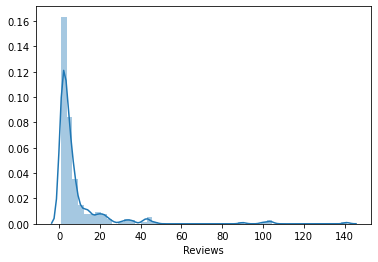

In [24]:
sns.distplot(df_full.Reviews)

Find the skew value for the column review==5

In [26]:
skewValueRow=df_full.Reviews.skew(axis=0)
print(skewValueRow,type(skewValueRow)) #the distribution is highly positive skewed.

4.89947158333185 <class 'numpy.float64'>


### Category and Reviews 

- List the unique Categories
- Display the average review for each unique Category 
- Sort and display the results using descending review


Result as follows:

```
               category        review
20               SOCIAL  2.186789e+06
6         COMMUNICATION  1.958544e+06
17                 GAME  1.318002e+06
30        VIDEO_PLAYERS  6.898731e+05
22          PHOTOGRAPHY  6.720308e+05
21             SHOPPING  4.699553e+05
9         ENTERTAINMENT  4.285650e+05
25                TOOLS  3.726878e+05
27         PRODUCTIVITY  3.070486e+05
24     TRAVEL_AND_LOCAL  2.710488e+05
32  MAPS_AND_NAVIGATION  2.472505e+05
26      PERSONALIZATION  2.441312e+05
18               FAMILY  2.310824e+05
23               SPORTS  2.283990e+05
29              WEATHER  1.947293e+05
8             EDUCATION  1.795715e+05
31   NEWS_AND_MAGAZINES  1.787145e+05
3   BOOKS_AND_REFERENCE  1.235752e+05
13   HEALTH_AND_FITNESS  1.177293e+05
12       FOOD_AND_DRINK  7.237033e+04
5                COMICS  5.830940e+04
11              FINANCE  5.362640e+04
4              BUSINESS  4.576928e+04
16            LIFESTYLE  4.203134e+04
14       HOUSE_AND_HOME  4.109399e+04
7                DATING  3.487525e+04
0        ART_AND_DESIGN  2.810356e+04
28            PARENTING  1.907218e+04
1     AUTO_AND_VEHICLES  1.594014e+04
15   LIBRARIES_AND_DEMO  1.583422e+04
2                BEAUTY  9.407929e+03
19              MEDICAL  4.623930e+03
10               EVENTS  3.568667e+03
```





In [27]:

cat_list = list(df['Category'].unique()
cat_review = []
for i in cat_list:
    #extract row with that category in i
    x = df[df['Category']==i].index #add code: ]

    if(len(x)!=0):
        
        #review = get averge of review in this category
        #store into cat_review
          review=df.filter(items=x,axis=0).Reviews.mean()
          cat_review.append(review)
    
#sorting
#construct a Dataframe to add into the category_list and category_review as the 2 columns
data_cat_rev = pd.DataFrame(list(zip(cat_list,cat_review)),columns=['category_list','category_review']) #add code: construct Dataframe
data_cat_rev.sort_values(by=['category_review'],ascending=False, inplace=True) #add code: sort base in reviews as the descending order 
data_cat_rev




,category_list,category_review
20,SOCIAL,2.186789e+06
6,COMMUNICATION,1.958544e+06
17,GAME,1.318002e+06
30,VIDEO_PLAYERS,6.898731e+05
22,PHOTOGRAPHY,6.720308e+05
21,SHOPPING,4.699553e+05
9,ENTERTAINMENT,4.285650e+05
25,TOOLS,3.726878e+05
27,PRODUCTIVITY,3.070486e+05
24,TRAVEL_AND_LOCAL,2.710488e+05
